### Library imports

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



SyntaxError: invalid syntax (488715405.py, line 2)

### Task1: Read and explore the dataset

In [14]:
df = pd.read_csv('../Weathering With You(Study Project)/data/open-meteo-subset.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   time                    8760 non-null   object 
 1   temperature_2m (°C)     8760 non-null   float64
 2   precipitation (mm)      8760 non-null   float64
 3   wind_speed_10m (m/s)    8760 non-null   float64
 4   wind_gusts_10m (m/s)    8760 non-null   float64
 5   wind_direction_10m (°)  8760 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 410.8+ KB


In [5]:
df.describe()

,temperature_2m (°C),precipitation (mm),wind_speed_10m (m/s),wind_gusts_10m (m/s),wind_direction_10m (°)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,-0.394909,0.222854,3.661689,8.300719,212.209589
std,6.711903,0.493747,2.253210,5.098909,91.371980
min,-19.300000,0.000000,0.100000,0.200000,0.000000
25%,-4.900000,0.000000,1.800000,4.500000,128.000000
50%,-1.000000,0.000000,3.300000,7.700000,238.000000
75%,4.100000,0.200000,5.100000,11.500000,292.000000
max,19.900000,5.800000,13.600000,28.700000,360.000000


In [6]:
# show the first five lines
df.head()

,time,temperature_2m (°C),precipitation (mm),wind_speed_10m (m/s),wind_gusts_10m (m/s),wind_direction_10m (°)
0,2020-01-01T00:00,-2.2,0.1,9.6,21.3,284
1,2020-01-01T01:00,-2.2,0.0,10.6,23.0,282
2,2020-01-01T02:00,-2.3,0.0,11.0,23.5,284
3,2020-01-01T03:00,-2.3,0.0,10.6,23.3,284
4,2020-01-01T04:00,-2.7,0.0,10.6,22.8,284


In [7]:
# show the last five lines
df.tail()

,time,temperature_2m (°C),precipitation (mm),wind_speed_10m (m/s),wind_gusts_10m (m/s),wind_direction_10m (°)
8755,2020-12-30T19:00,-6.5,0.0,1.6,4.0,58
8756,2020-12-30T20:00,-7.0,0.0,1.2,3.4,50
8757,2020-12-30T21:00,-7.5,0.0,1.1,2.4,22
8758,2020-12-30T22:00,-7.2,0.0,0.6,1.6,22
8759,2020-12-30T23:00,-7.5,0.0,0.5,0.7,8


### Task 2: Plot each column separately

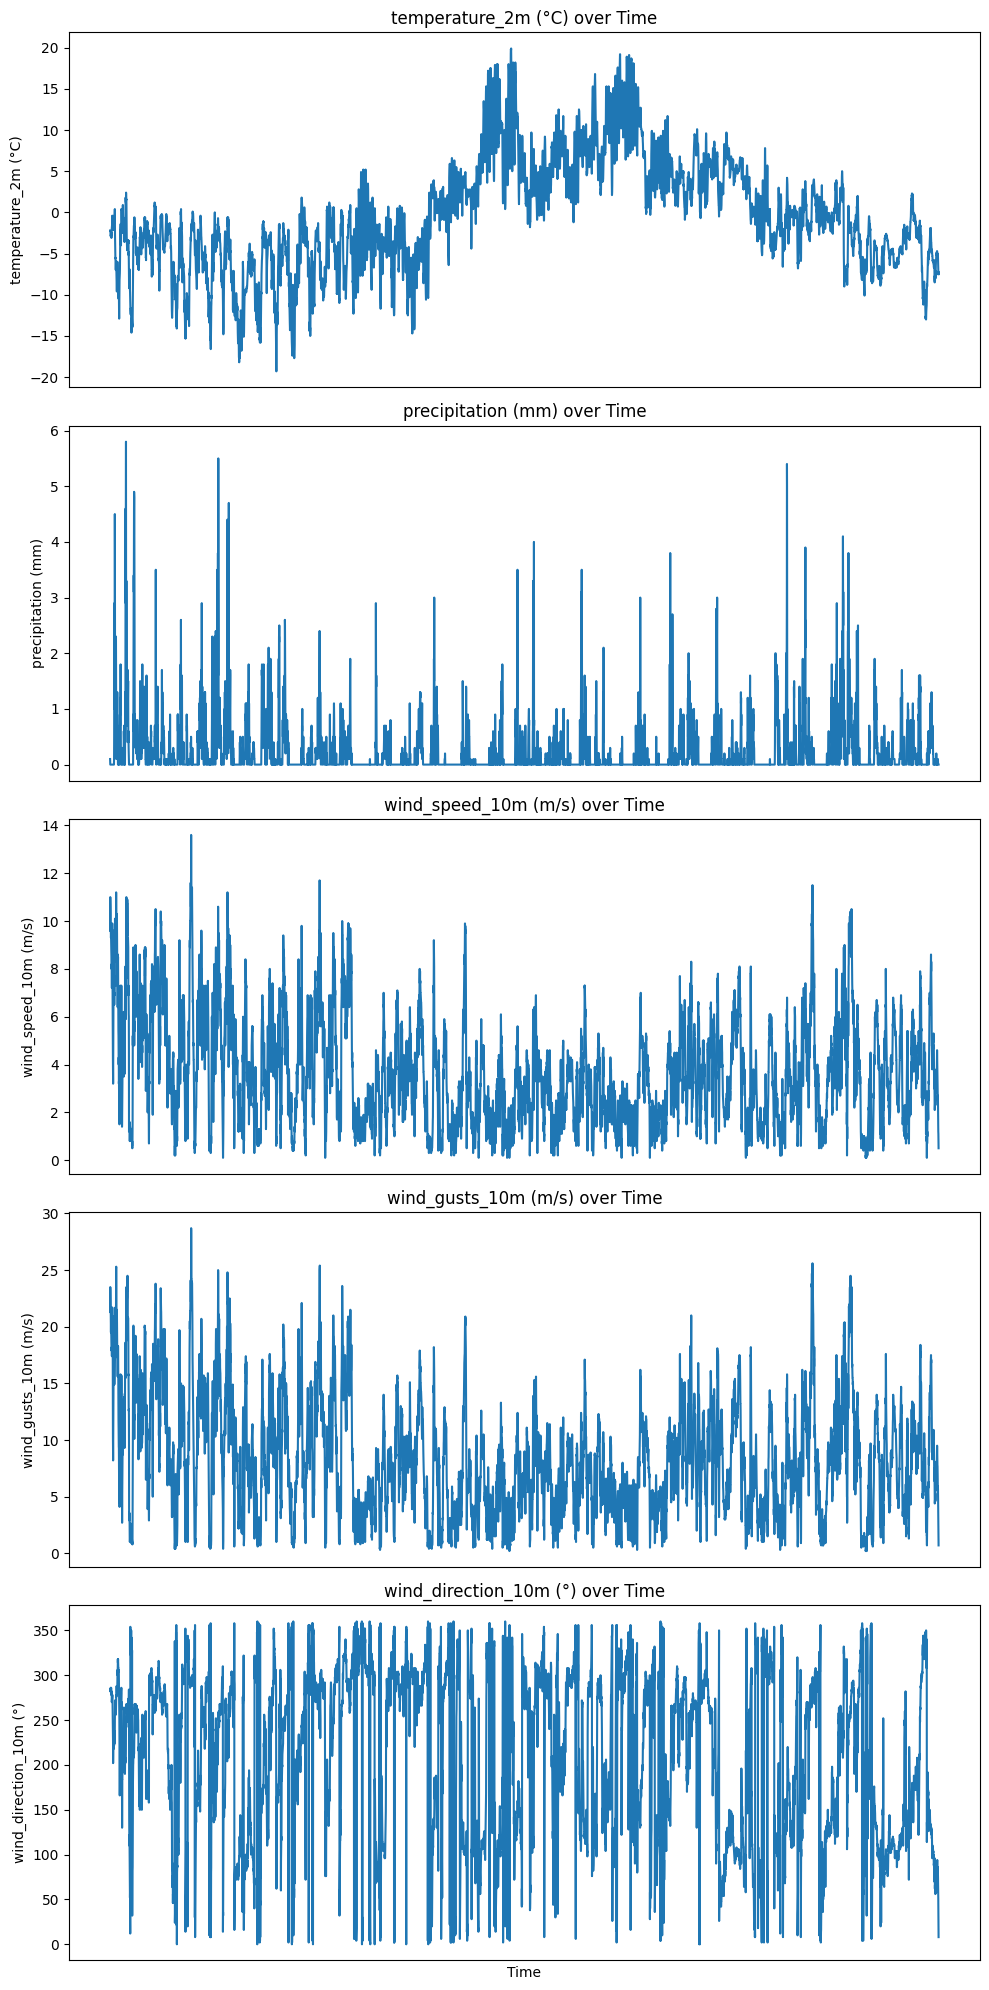

In [8]:
fig, ax = plt.subplots(5, 1, figsize=(10, 20), sharex=True)

for i, col in enumerate(df.columns[1:6]):
    ax[i].plot(df['time'], df[col])
    ax[i].set_ylabel(col)
    ax[i].set_title(f'{col} over Time')
    ax[i].set_xticks([]) 

ax[-1].set_xlabel('Time') 
plt.tight_layout()
plt.show()

### Task 2: Resample the original dataset to show the x-axis

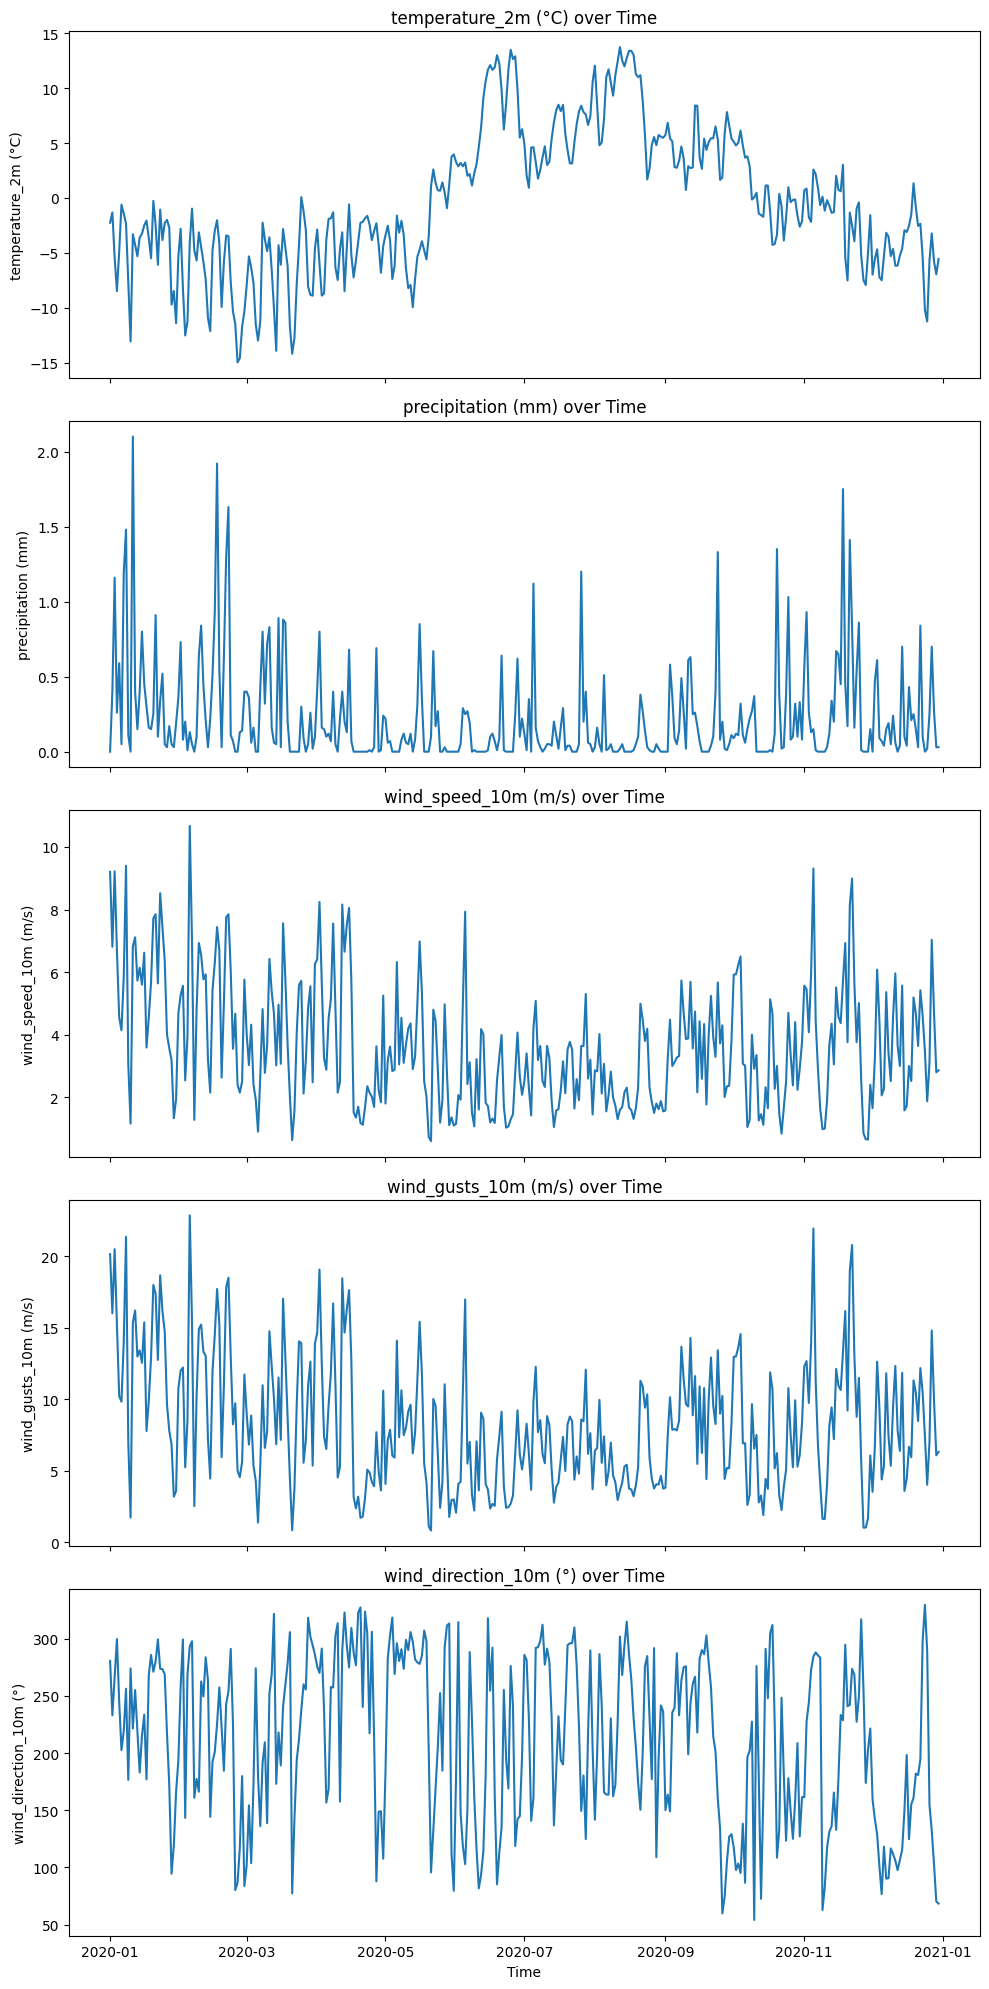

In [65]:
# calculate the mean value of each day
df_day = df.copy()
df_day['time'] = pd.to_datetime(df_day['time'])
df_day = df_day.resample('D', on='time').mean().reset_index().round(2)

fig, ax = plt.subplots(5, 1, figsize=(10, 20), sharex=True)

for i, col in enumerate(df_day.columns[1:6]):
    ax[i].plot(df_day['time'], df_day[col])
    ax[i].set_ylabel(col)
    ax[i].set_title(f'{col} over Time')

ax[-1].set_xlabel('Time') 
plt.tight_layout()
plt.show()

### Task 3: Plot all columns together.

In [ ]:
# use the plotly module to plot
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Scatter(x=df_day['time'], y=df_day['temperature_2m (°C)'],mode='lines',name='temperature_2m (°C)'))
fig.add_trace(go.Scatter(x=df_day['time'], y=df_day['precipitation (mm)'],mode='lines',name='precipitation (mm)'))
fig.add_trace(go.Scatter(x=df_day['time'], y=df_day['wind_speed_10m (m/s)'],mode='lines',name='wind_speed_10m (m/s)'))
fig.add_trace(go.Scatter(x=df_day['time'], y=df_day['wind_direction_10m (°)'],mode='lines',name='wind_direction_10m (°)'))
fig.show()
